Mean ROC-AUC: 0.9764198262855489 (95% CI: 0.9721711524095022, 0.9806685001615956)
Mean PR-AUC: 0.46874840250403627 (95% CI: 0.46147166138699697, 0.47602514362107556)
Mean F1 Score: 0.923588787021783 (95% CI: 0.9167846027906058, 0.9303929712529603)
Mean Matthews Correlation Coefficient: 0.8447693188740699 (95% CI: 0.8307730022197002, 0.8587656355284397)


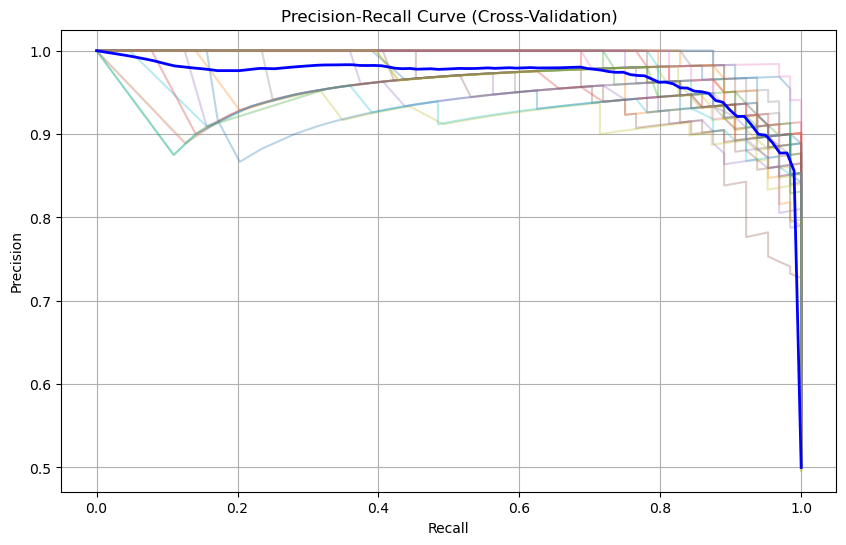

SHAP values matrix:
[[[-0.00137457  0.00137457]
  [-0.00922684  0.00922684]
  [ 0.0457142  -0.0457142 ]
  ...
  [ 0.01528491 -0.01528491]
  [ 0.06284156 -0.06284156]
  [ 0.00103516 -0.00103516]]

 [[-0.00629437  0.00629437]
  [ 0.02141313 -0.02141313]
  [ 0.02925584 -0.02925584]
  ...
  [ 0.00714939 -0.00714939]
  [ 0.03944628 -0.03944628]
  [ 0.00031324 -0.00031324]]

 [[-0.00195859  0.00195859]
  [-0.00711596  0.00711596]
  [-0.02657681  0.02657681]
  ...
  [ 0.01264597 -0.01264597]
  [ 0.05490846 -0.05490846]
  [ 0.00210018 -0.00210018]]

 ...

 [[-0.00312632  0.00312632]
  [ 0.02040813 -0.02040813]
  [ 0.03851971 -0.03851971]
  ...
  [ 0.01093435 -0.01093435]
  [ 0.05050443 -0.05050443]
  [ 0.00076552 -0.00076552]]

 [[ 0.00541161 -0.00541161]
  [-0.01147154  0.01147154]
  [ 0.039799   -0.039799  ]
  ...
  [ 0.01292247 -0.01292247]
  [-0.08468733  0.08468733]
  [ 0.00022413 -0.00022413]]

 [[-0.00947521  0.00947521]
  [ 0.0195066  -0.0195066 ]
  [ 0.02532893 -0.02532893]
  ...
  [ 

<Figure size 640x480 with 0 Axes>

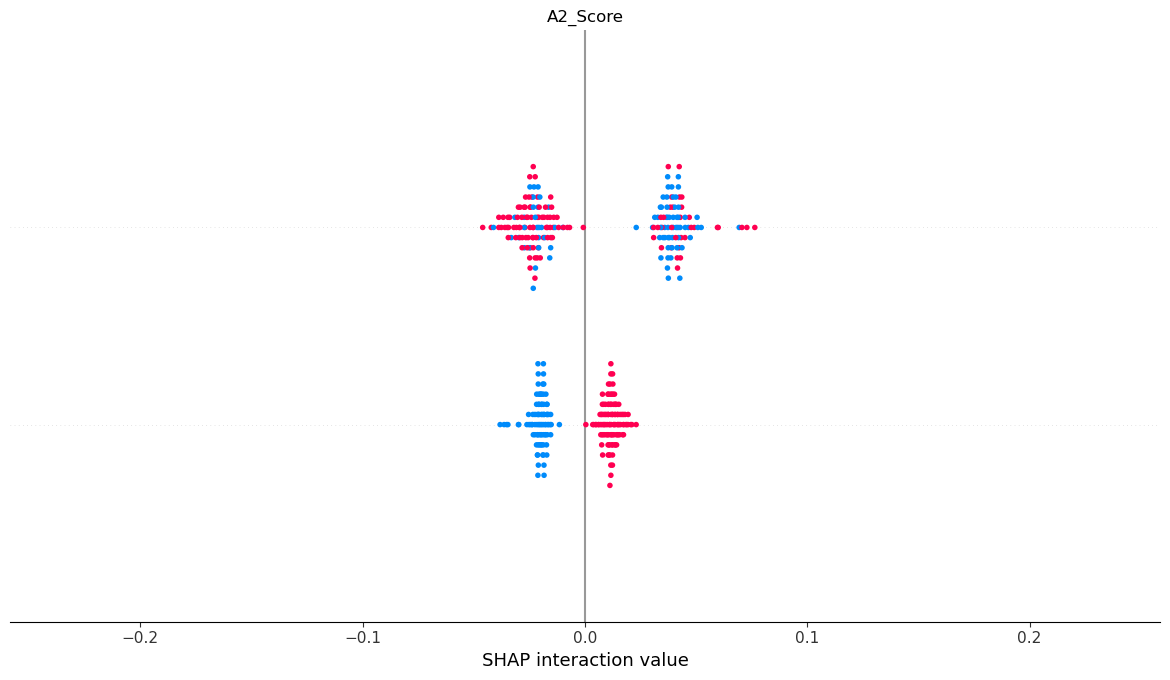

Silhouette Score for Hierarchical Clustering: 0.7433589618973309
Davies-Bouldin Score for Hierarchical Clustering: 0.25115603258525726
Cophenetic Correlation Coefficient: 0.9530247940890221
Cluster Sizes: Counter({3: 173, 8: 6, 1: 6, 2: 3, 0: 3, 7: 2, 4: 2, 11: 1, 6: 1, 5: 1, 9: 1, 10: 1})


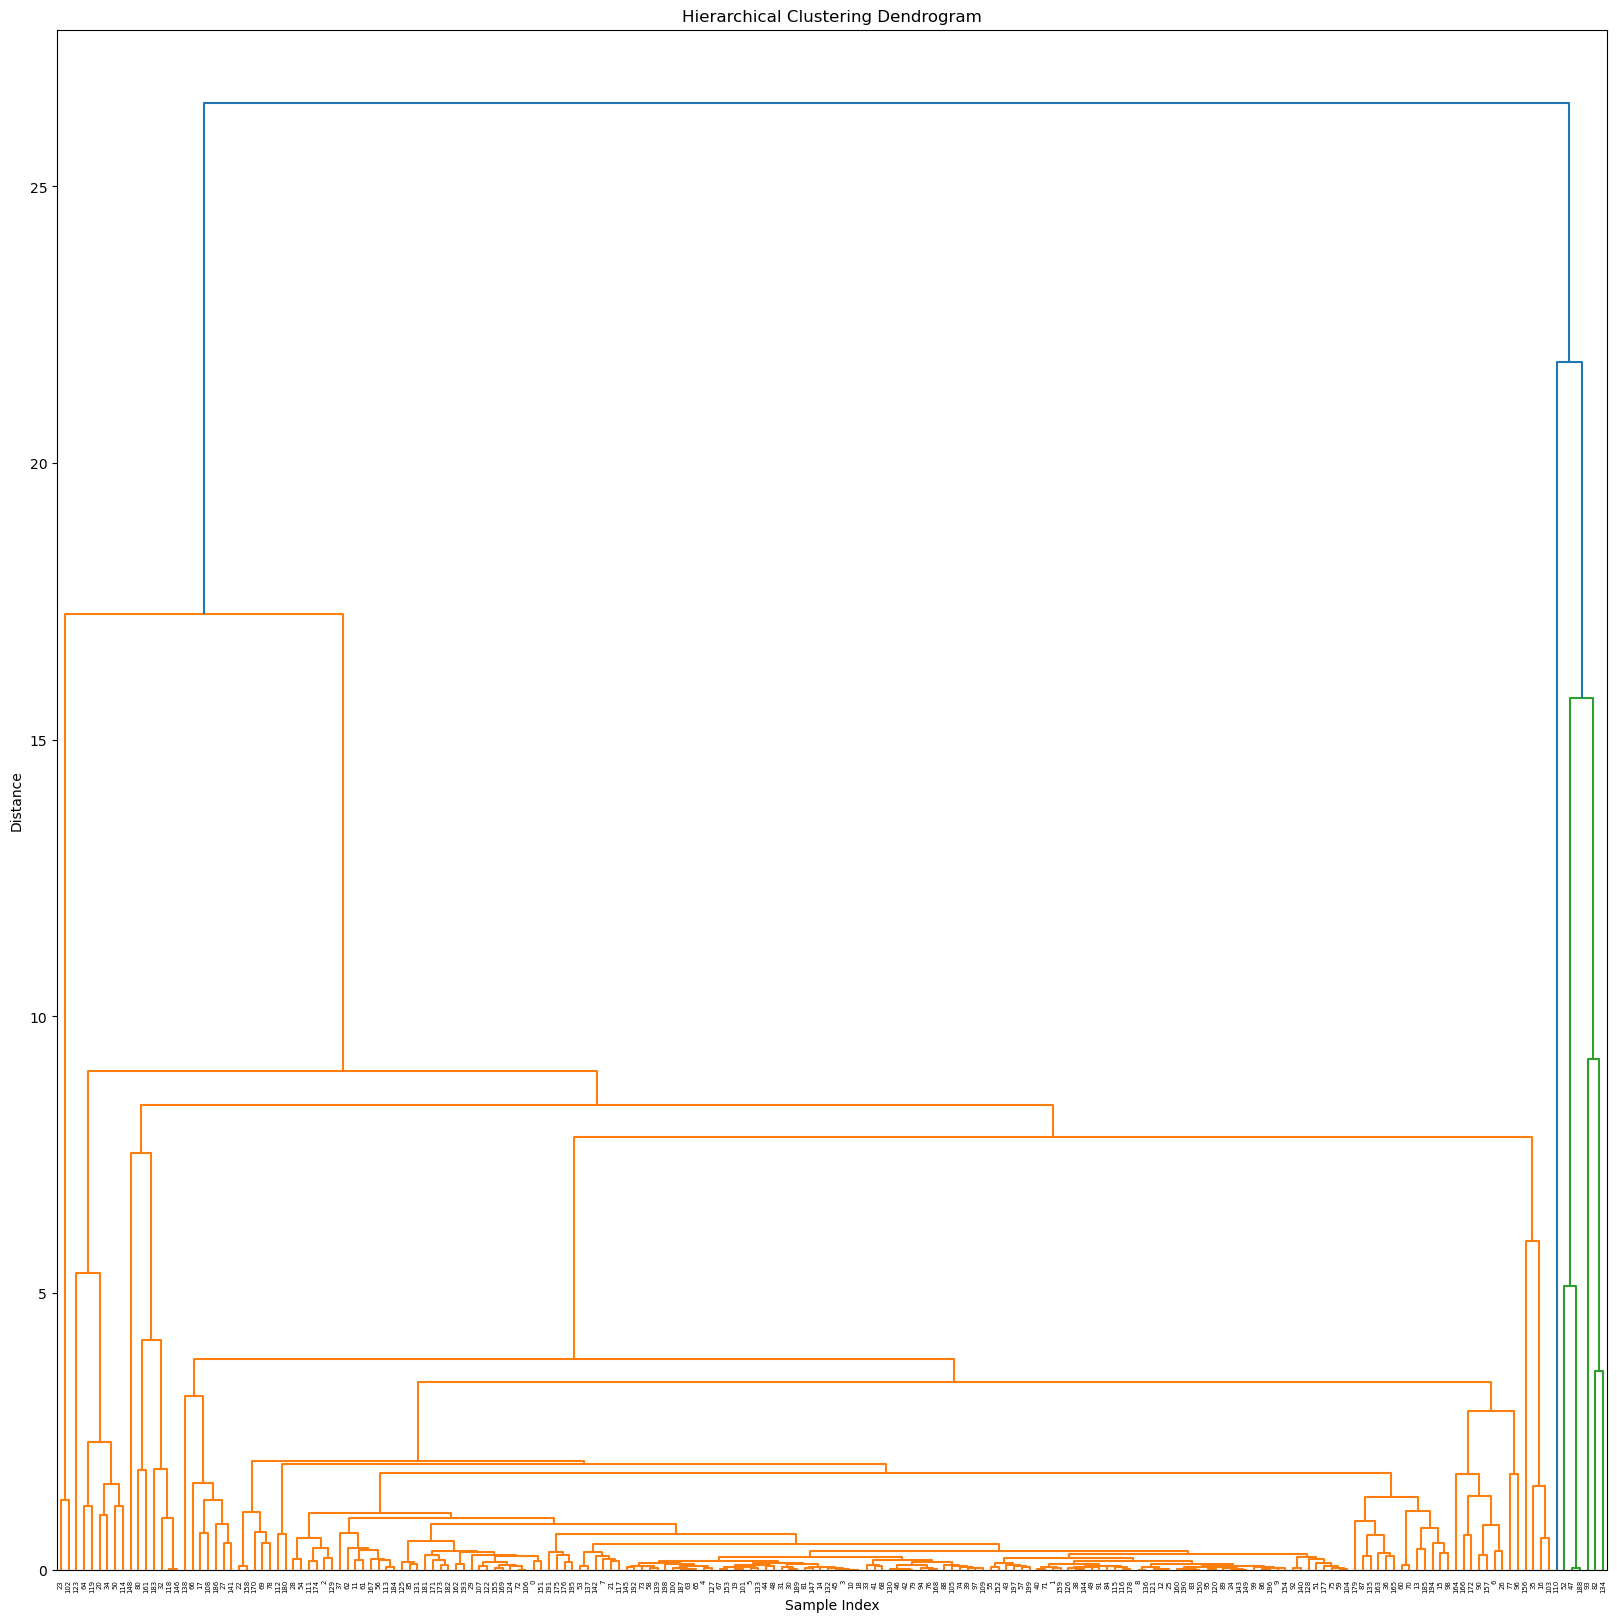

Cluster 0:
          PCA1      PCA2  Cluster
47  -26.069807 -4.958348        0
52  -21.736552 -2.198422        0
188 -26.065014 -4.936609        0
Cluster 1:
         PCA1      PCA2  Cluster
32  -6.030086  1.488569        1
80  -7.416961 -2.087662        1
118 -5.688805  0.610323        1
146 -5.688857  0.612507        1
161 -5.940161 -3.112353        1
183 -5.830364  2.712485        1
Cluster 2:
         PCA1      PCA2  Cluster
16   4.325958  6.151614        2
35   5.588971  6.644285        2
103  3.913929  6.537846        2
Cluster 3:
         PCA1      PCA2  Cluster
0    0.972421 -0.102032        3
1    1.330885  0.650667        3
2    0.191191  0.155663        3
3    1.245436  0.268507        3
4    1.108652  0.355292        3
..        ...       ...      ...
195  0.950554  0.892326        3
196  1.230858  0.513109        3
197  1.158863  0.446879        3
198  1.057071  0.306413        3
199  1.094259  0.491379        3

[173 rows x 3 columns]
Cluster 4:
          PCA1      PCA2  

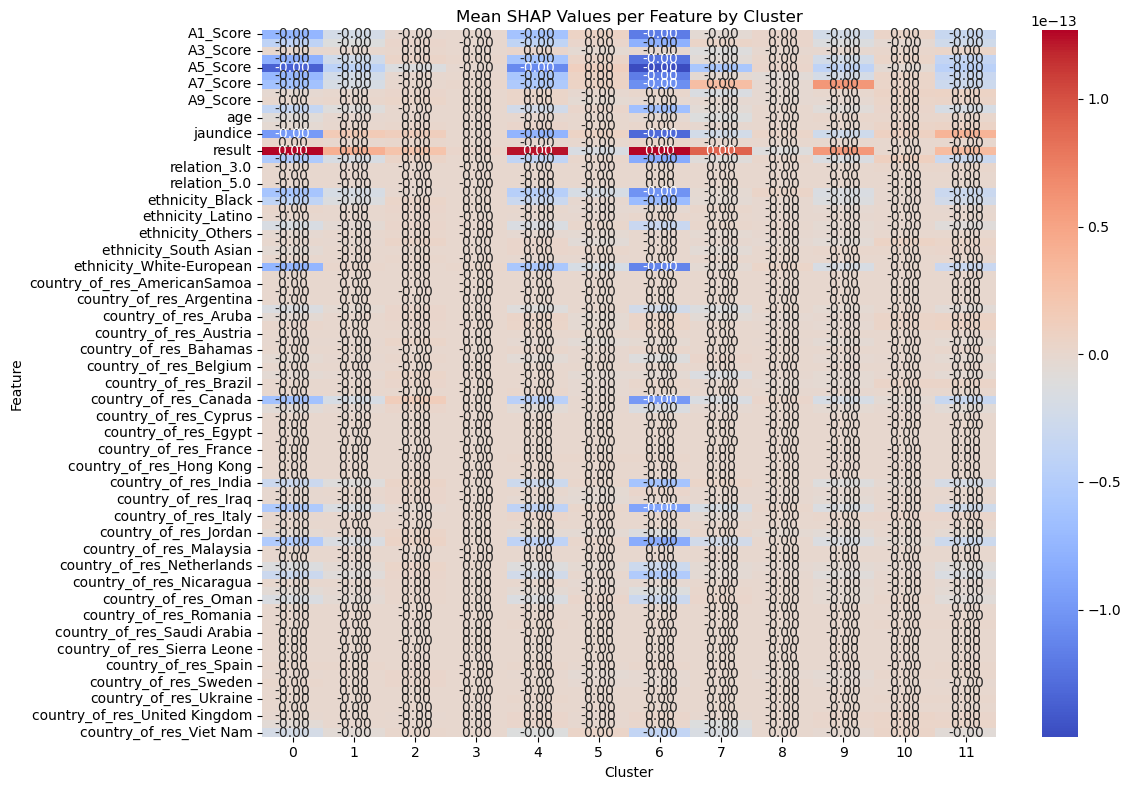

        A1_Score                                                              \
           count      mean       std       min       25%       50%       75%   
Cluster                                                                        
0            3.0  0.749898  0.000000  0.749898  0.749898  0.749898  0.749898   
1            6.0  0.749898  0.000000  0.749898  0.749898  0.749898  0.749898   
2            3.0  0.749898  0.000000  0.749898  0.749898  0.749898  0.749898   
3          173.0 -0.273744  1.044573 -1.333514 -1.333514  0.749898  0.749898   
4            2.0  0.749898  0.000000  0.749898  0.749898  0.749898  0.749898   
5            1.0  0.749898       NaN  0.749898  0.749898  0.749898  0.749898   
6            1.0  0.749898       NaN  0.749898  0.749898  0.749898  0.749898   
7            2.0  0.749898  0.000000  0.749898  0.749898  0.749898  0.749898   
8            6.0  0.749898  0.000000  0.749898  0.749898  0.749898  0.749898   
9            1.0  0.749898       NaN  0.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
# Load the shap values from the RandomForest model
%run RandomForestShap.ipynb  # Make sure shap_values and X_test are defined in there

# Step 1: Average SHAP values across classes (shape: n_samples x n_features)
shap_values_avg = np.mean(shap_values, axis=2)  # If shap_values is shape (n_samples, n_features, n_classes)

scaler = StandardScaler()
shap_scaled = scaler.fit_transform(shap_values_avg)


pca = PCA(n_components=2)
shap_pca = pca.fit_transform(shap_scaled)
#shap_pca = shap_values_avg

# Step 2: Perform hierarchical clustering
model = AgglomerativeClustering(12, linkage='average')
cluster_labels = model.fit_predict(shap_pca)

# Step 5: Generate the linkage matrix
Z = linkage(shap_pca, method='average')

# Step 6: Calculate the Cophenetic Correlation Coefficient
# Use pdist to get the pairwise distances in condensed format
distance_matrix = pdist(shap_pca)
coph_corr, _ = cophenet(Z, distance_matrix)


# Step 3: Evaluate the clustering
silhouette = silhouette_score(shap_pca, cluster_labels)
db_score = davies_bouldin_score(shap_pca, cluster_labels)

print(f"Silhouette Score for Hierarchical Clustering: {silhouette}")
print(f"Davies-Bouldin Score for Hierarchical Clustering: {db_score}")
print(f"Cophenetic Correlation Coefficient: {coph_corr}")

# Check how many samples are in each cluster
cluster_counts = Counter(cluster_labels)
print("Cluster Sizes:", cluster_counts)

from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
plt.figure(figsize=(20, 20))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

clustered_data = pd.DataFrame(shap_pca, columns=["PCA1", "PCA2"])
clustered_data['Cluster'] = cluster_labels

# Display the samples in each cluster
for cluster in np.unique(cluster_labels):
    print(f"Cluster {cluster}:")
    print(clustered_data[clustered_data['Cluster'] == cluster])

# Create a DataFrame of SHAP values using feature names from X_test
shap_df = pd.DataFrame(shap_values_avg, columns=X_test.columns)

# Add the cluster labels from hierarchical clustering
shap_df['Cluster'] = cluster_labels

# Compute mean SHAP values for each feature grouped by cluster
cluster_mean_shap = shap_df.groupby('Cluster').mean()

# Transpose for easier plotting (features as rows, clusters as columns)
cluster_mean_shap_T = cluster_mean_shap.T

# Plot the heatmap of SHAP importance per cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_mean_shap_T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mean SHAP Values per Feature by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


X_with_cluster = X_test.copy()  # Or the appropriate feature set you're using
X_with_cluster['Cluster'] = cluster_labels

#This gives you a statistical summary per cluster:
cluster_profiles = X_with_cluster.groupby('Cluster').describe()
cluster_profiles.to_csv('cluster_profiles.csv')  # Save to CSV if needed

print(cluster_profiles)

#To view just means per feature per cluster:
cluster_means = X_with_cluster.groupby('Cluster').mean()
# Save to CSV if needed
cluster_means.to_csv('cluster_means.csv')
print(cluster_means)




# Cluster Analysis Summary

Below is a summary of each cluster, highlighting the key characteristics and why they are grouped as such.

---

### **Cluster 0**: Homogeneous Group with High Scores
- **Characteristics**:
  - The scores for all metrics (A1_Score, A2_Score, etc.) are uniformly high around 0.749898, with minimal variation.
  - The **United States** appears as the primary country of residence for this cluster.
  
- **Reason for Grouping**:
  - **Cluster 0** is likely grouped because the individuals share similar high scores across various metrics, suggesting they exhibit similar behaviors, performance, or characteristics.
  - The dominance of the United States indicates a regional pattern, suggesting that people from the U.S. in this cluster have similar responses or attributes, such as performance or behavior, reflected in the scores.

---

### **Cluster 1**: High Scores with United States Dominance
- **Characteristics**:
  - Similar to **Cluster 0**, **Cluster 1** shows high scores across metrics (A1_Score, A2_Score, etc.).
  - The cluster is also predominantly from the **United States**.
  
- **Reason for Grouping**:
  - The high and consistent scores, especially in the A1, A2, and A3 metrics, suggest that **Cluster 1** represents individuals or entities with similar high performance or behavior traits.
  - The geographic dominance of the United States further strengthens the idea that this cluster might represent a specific demographic or group from that region with similar characteristics.

---

### **Cluster 2**: Consistently High Scores with a Global Spread
- **Characteristics**:
  - The scores for **Cluster 2** are very similar to those in **Cluster 0** and **Cluster 1**.
  - However, there is a more diverse distribution of countries, suggesting a global representation.
  
- **Reason for Grouping**:
  - Like **Cluster 0** and **Cluster 1**, **Cluster 2** shows similar high scores, indicating that the individuals within this cluster share similar performance or behavioral traits.
  - The presence of multiple countries in this cluster suggests that these individuals are globally distributed but still exhibit similar attributes or behavior, resulting in their grouping together.

---

### **Cluster 3**: Diverse Scores and Global Mix
- **Characteristics**:
  - **Cluster 3** stands out with much more variability in its scores (A1_Score = -0.273744), unlike the other clusters.
  - This cluster seems to represent a more diverse group in terms of both scores and country distribution, including people from countries like **United States**, **Viet Nam**, and others.
  
- **Reason for Grouping**:
  - The greater variability in the scores suggests that **Cluster 3** consists of individuals with diverse characteristics, behaviors, or attributes.
  - The mix of countries shows that the diversity isn't just within the scores but also geographically, further indicating a less homogeneous group.
  - This diversity in both performance metrics and geographic locations likely contributed to the grouping of **Cluster 3**.

---

### **Cluster 4**: Uniform High Scores with Low Country Diversity
- **Characteristics**:
  - **Cluster 4** exhibits high scores across all metrics, similar to **Clusters 0, 1, and 2**.
  - The country of residence seems to show minimal diversity.
  
- **Reason for Grouping**:
  - The high and consistent scores across the metrics point to a group of individuals who are similar in their behaviors or performance.
  - The low diversity in countries suggests that this group may come from a specific region or demographic where these high scores are common.

---

### **Cluster 5**: Similar Scores but More Country Representation
- **Characteristics**:
  - This cluster shows moderate to high scores in most metrics but with slightly more variation compared to **Cluster 0** and **Cluster 1**.
  - It features a broader representation of countries compared to other clusters.
  
- **Reason for Grouping**:
  - The similarity in scores within **Cluster 5** suggests that while these individuals have similar behaviors or performance, they may still represent a diverse set of characteristics.
  - The broader country representation hints at a more globally distributed group with shared traits that lead to similar scoring patterns.

---

### **Cluster 6**: Moderate Scores with a Balance of Countries
- **Characteristics**:
  - The scores in **Cluster 6** are moderate compared to the other clusters, not as high as in **Cluster 0**, **Cluster 1**, or **Cluster 2**.
  - The countries of residence appear more evenly distributed, indicating a balanced representation across different regions.
  
- **Reason for Grouping**:
  - **Cluster 6** is likely composed of individuals with moderate performance or behavior metrics that align across various scores but not at the highest level.
  - The even distribution of countries suggests that the group is made up of people from different regions, but they share similar characteristics that place them in the same cluster.

---

### **Cluster 7**: High Scores with Regional Focus (United States)
- **Characteristics**:
  - Like **Clusters 0, 1, 2**, and **4**, **Cluster 7** shows high, consistent scores across all metrics.
  - The **United States** is again the dominant country of residence.
  
- **Reason for Grouping**:
  - The high scores suggest that **Cluster 7** represents individuals with high performance or specific behaviors that align with the scoring system.
  - The dominance of the **United States** reinforces the idea that this cluster may represent a specific demographic or regional group with similar characteristics.

---

### **Cluster 8**: Consistent Scores with Diverse Countries
- **Characteristics**:
  - **Cluster 8** shows consistent high scores, similar to other high-score clusters.
  - There is a more diverse distribution of countries, including non-U.S. locations.
  
- **Reason for Grouping**:
  - The consistent high scores across the metrics indicate that this group shares similar performance or behavioral patterns.
  - The diversity in countries shows that this cluster likely represents individuals from various regions who exhibit similar behavior or performance, leading to their grouping together.

---

### **Cluster 9**: Uniform High Scores with Limited Country Representation
- **Characteristics**:
  - **Cluster 9** shows consistent high scores, resembling **Cluster 0** and other similar clusters.
  - There seems to be minimal diversity in the country of residence.
  
- **Reason for Grouping**:
  - The high, consistent scores suggest that the individuals in this cluster share common behaviors or performance characteristics.
  - The lack of diversity in countries suggests that these individuals might come from a specific region or demographic with similar traits.

---

### **Cluster 10**: High Scores with Predominance of the United States
- **Characteristics**:
  - High, uniform scores across all metrics, similar to **Cluster 0** and others with similar scoring.
  - The **United States** is again the dominant country of residence.
  
- **Reason for Grouping**:
  - Like other high-score clusters, **Cluster 10** is made up of individuals who share similar high performance or behavior scores.
  - The dominance of the **United States** points to a regional pattern, suggesting that individuals from this area have similar attributes or behaviors as reflected in their scores.

---

### **Cluster 11**: High Consistency and U.S. Dominance
- **Characteristics**:
  - **Cluster 11** shows consistently high scores across all metrics.
  - The **United States** is again the most common country of residence.
  
- **Reason for Grouping**:
  - The high and consistent scores indicate that the individuals in **Cluster 11** share similar behaviors, performance, or characteristics.
  - The regional dominance of the **United States** suggests a specific demographic or behavioral pattern that is consistent with other high-scoring clusters.

---

### **Conclusion**
- **Clusters with High Uniformity**: Many clusters, including **0, 1, 2, 4, 7, 8, 9, 10, and 11**, share very high, consistent scores across the metrics, suggesting they represent individuals with similar performance or behaviors.
- **Cluster 3** stands out as the most diverse, with significant score variability and a more diverse mix of countries, making it distinct from the rest.
- **Geographic Patterns**: Several clusters, particularly **0, 1, 7, 9, 10, and 11**, show a heavy concentration of individuals from the **United States**, suggesting regional influences in the clustering process.


Hierarchical Clustering Dendrogram
each index item is a person and they connect based on some relation to eachother

Mean SHAP Values per Feature by Cluster
this shows what features have an impact on which clusters
blue leans awasy from having asd
red leans twards having asd 
wight means nothing/no lean